In [2]:
import cv2 as cv
import numpy as np

events = [i for i in dir(cv) if "EVENT" in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [3]:
def draw_circle(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), 50, (150, 0, 200), 4)


img = np.zeros((512, 512, 3), np.uint8)

cv.namedWindow("Image")
cv.setMouseCallback("Image", draw_circle)

while True:
    cv.imshow("Image", img)
    if cv.waitKey(1) & 0xFF == 27:
        break
cv.destroyAllWindows()

## Drawing with a brush

In [4]:
import matplotlib.pyplot as plt

drawing = False  # True when mouse pressed

### Mouse callback function

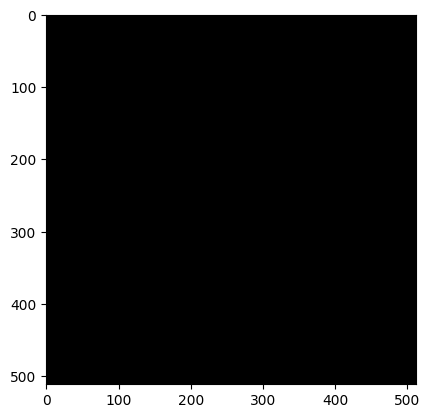

In [5]:
def brush(event, x, y, flags, param):
    global drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.circle(img, (x, y), 5, (0, 0, 200), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False


img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow("Image")
cv.setMouseCallback("Image", brush)

while True:
    cv.imshow("Image", img)
    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[..., ::-1])


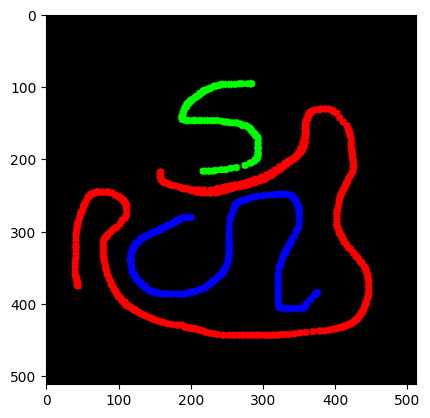

In [7]:
drawing = False
color = (0, 255, 0)


def brush(event, x, y, flags, param):
    global drawing, color
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.circle(img, (x, y), 5, color, -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False


img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow("Image")
cv.setMouseCallback("Image", brush)

while True:
    cv.imshow("Image", img)
    k = cv.waitKey(1) & 0xFF
    if k == ord("b"):
        color = (255, 0, 0)
    elif k == ord("g"):
        color = (0, 255, 0)
    elif k == ord("r"):
        color = (0, 0, 255)
    elif k == 27:
        break

cv.destroyAllWindows()

plt.imshow(img[..., ::-1])

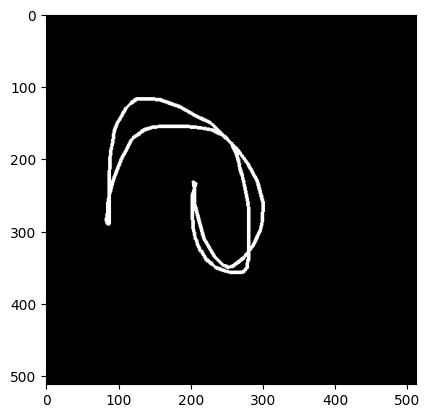

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

img = np.zeros((512, 512, 3), np.uint8)
drawing = False
ix = 0
iy = 0


# Adding Function Attached To Mouse Callback
def draw(event, x, y, flags, param):
    global ix, iy, drawing

    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.line(img, pt1=(ix, iy), pt2=(x, y), color=(255, 255, 255), thickness=3)
            ix = x
            iy = y
    if event == cv.EVENT_LBUTTONUP:
        drawing = False


cv.namedWindow("Window")
cv.setMouseCallback("Window", draw)

while True:
    cv.imshow("Window", img)

    if cv.waitKey(1) & 0xFF == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[..., ::-1])

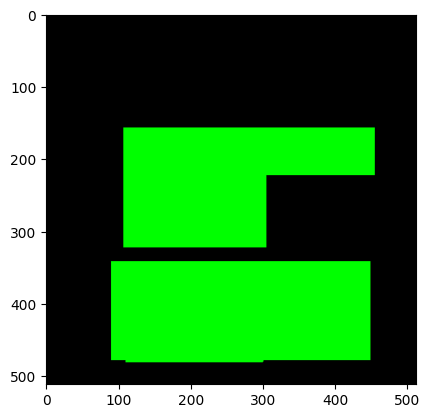

In [6]:
drawing = False
start_point = (0, 0)


def draw_rectangle(event, x, y, flags, param):
    global start_point, drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x, y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.rectangle(img, start_point, (x, y), (0, 255, 0), -1)

    elif event == cv.EVENT_LBUTTONUP:
        drawing = False


img = np.zeros((512, 512, 3), np.uint8)
cv.namedWindow("Image")
cv.setMouseCallback("Image", draw_rectangle)

while True:
    cv.imshow("Image", img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()
plt.imshow(img[..., ::-1])

[[(237, 195), (627, 486)], [(611, 479), (359, 194)], [(351, 220), (349, 375)], [(317, 395), (320, 294)], [(466, 377), (503, 163)], [(469, 105), (273, 434)]]


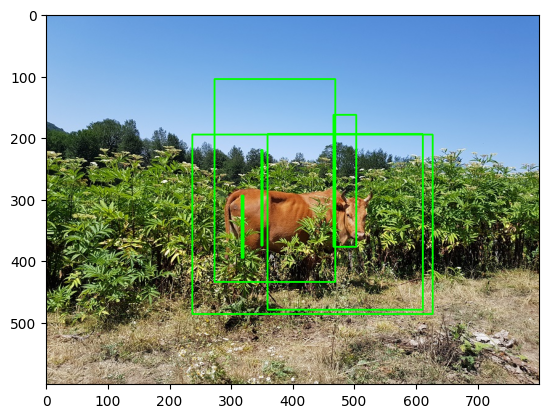

In [31]:
start_point = (0, 0)
points = []
drawing = False
image = cv.imread("images/input.jpg")
clone = image.copy()

def draw_empty_rectangle(event, x, y, flags, params):
    global start_point, points, drawing, clone

    if event == cv.EVENT_LBUTTONDOWN:
        start_point = x, y
        drawing = True
    if event == cv.EVENT_MOUSEMOVE:
        if drawing:
            clone = image.copy()
            cv.rectangle(clone, start_point, (x, y), (0, 255, 0), 2)
    elif event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x, y)])
        drawing = False

        cv.rectangle(image, start_point, (x, y), (0, 255, 0), 2)
        cv.imshow("Image", image)



cv.namedWindow("Image")
cv.setMouseCallback("Image", draw_empty_rectangle)

while True:
    cv.imshow("Image", clone)
    key = cv.waitKey(1) & 0xFF

    if key == ord("r"):
        image = clone.copy()
        points = []
    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(image[..., ::-1])
print(points)
